In [14]:
cd

/home/jovyan


In [17]:
import datacube 
from datacube.virtual import catalog_from_file
dc = datacube.Datacube()
service = '/home/jovyan/development/'
x = (350000, 400000)
y = (-3500000, -3450000)
res = (-100, 100)
crs = "EPSG:3577"
time = ("2015-01-01", "2015-12-31")
query =({'time': time,
             'x':x,
            'y':y,
            'crs':crs,
            'resolution':res})
catalog = catalog_from_file(str(service)+'livingearth_australia/le_plugins/virtual_product_cat.yaml')
# product = catalog['salty']
# data = product.load(dc, **query)
# (data.vssi.squeeze()).plot.imshow()

In [18]:
# data

In [3]:
# data.squeeze(dim='time',drop=True)

In [6]:
import importlib
import sys
import os
from datacube.virtual import DEFAULT_RESOLVER
sys.path.append(os.path.abspath(str(service)+"livingearth_australia/le_plugins"))
sys.path.append(str(service)+"dea-notebooks/Scripts")
sys.path.append(str(service)+"livingearth_australia")

#see what's already in the resolver 
DEFAULT_RESOLVER.lookup_table['transform']

# Now we add the transformation we're testing
# Get location of transformation
transformation = "le_plugins.salt_mask_new"
trans_loc = importlib.import_module(transformation)
trans_class = transformation.split('.')[-1]
DEFAULT_RESOLVER.register('transform', trans_class, getattr(trans_loc, trans_class) )

In [19]:
#see what's now in the resolver 
DEFAULT_RESOLVER.lookup_table['transform']

{'make_mask': datacube.virtual.transformations.MakeMask,
 'apply_mask': datacube.virtual.transformations.ApplyMask,
 'to_float': datacube.virtual.transformations.ToFloat,
 'rename': datacube.virtual.transformations.Rename,
 'select': datacube.virtual.transformations.Select,
 'expressions': datacube.virtual.transformations.Expressions,
 'FC_summary': le_plugins.FC_summary.FC_summary,
 'salt_mask_new': le_plugins.salt_mask_new.salt_mask_new}

VSSI <xarray.DataArray 'vssi' (y: 500, x: 500)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
    spatial_ref  int32 0
  * x            (x) float64 3.500e+05 3.502e+05 3.502e+05 ... 3.998e+05 4e+05
  * y            (y) float64 -3.45e+06 -3.45e+06 -3.45e+06 ... -3.5e+06 -3.5e+06


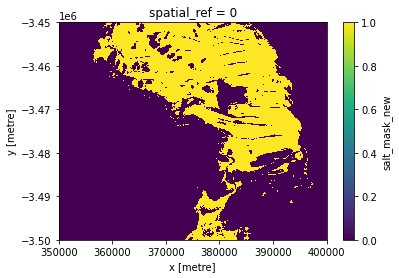

In [23]:
product = catalog['salty']
salt = product.load(dc, **query)
(salt.salt_mask_new.squeeze()).plot.imshow()

TIMESTAMP
Coordinates:
    spatial_ref  int32 0
  * x            (x) float64 3.500e+05 3.502e+05 3.502e+05 ... 3.998e+05 4e+05
  * y            (y) float64 -3.45e+06 -3.45e+06 -3.45e+06 ... -3.5e+06 -3.5e+06
thing
<xarray.Dataset>
Dimensions:      (x: 500, y: 500)
Coordinates:
    spatial_ref  int32 0
  * x            (x) float64 3.500e+05 3.502e+05 3.502e+05 ... 3.998e+05 4e+05
  * y            (y) float64 -3.45e+06 -3.45e+06 -3.45e+06 ... -3.5e+06 -3.5e+06
Data variables:
    fc_veg       (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 1.0 0.0 0.0 1.0


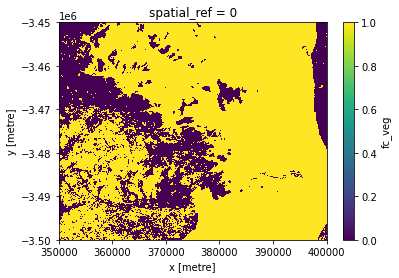

In [24]:
product = catalog['fc_veg']
fc = product.load(dc, **query)
(fc.fc_veg.squeeze()).plot.imshow()

In [23]:
fc


<xarray.Dataset>
Dimensions:      (x: 500, y: 500)
Coordinates:
    spatial_ref  int32 0
  * x            (x) float64 3.500e+05 3.502e+05 3.502e+05 ... 3.998e+05 4e+05
  * y            (y) float64 -3.45e+06 -3.45e+06 -3.45e+06 ... -3.5e+06 -3.5e+06
Data variables:
    fc_veg       (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 1.0 0.0 0.0 1.0
Attributes:
    crs:      EPSG:3577

In [45]:
salt32 = salt.astype('float32')#.squeeze(dim='time',drop=True)
salt32

<xarray.Dataset>
Dimensions:      (x: 500, y: 500)
Coordinates:
    spatial_ref  int32 0
  * x            (x) float64 3.500e+05 3.502e+05 3.502e+05 ... 3.998e+05 4e+05
  * y            (y) float64 -3.45e+06 -3.45e+06 -3.45e+06 ... -3.5e+06 -3.5e+06
Data variables:
    salt_mask    (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [60]:
salt32.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:      (x: 500, y: 500)
Coordinates:
    spatial_ref  int32 0
  * x            (x) float64 3.500e+05 3.502e+05 3.502e+05 ... 3.998e+05 4e+05
  * y            (y) float64 -3.45e+06 -3.45e+06 -3.45e+06 ... -3.5e+06 -3.5e+06
Data variables:
    salt_mask    (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0>

In [58]:
fc.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:      (x: 500, y: 500)
Coordinates:
    spatial_ref  int32 0
  * x            (x) float64 3.500e+05 3.502e+05 3.502e+05 ... 3.998e+05 4e+05
  * y            (y) float64 -3.45e+06 -3.45e+06 -3.45e+06 ... -3.5e+06 -3.5e+06
Data variables:
    fc_veg       (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 1.0 0.0 0.0 1.0
Attributes:
    crs:      EPSG:3577>

In [75]:
# masked = fc.where(((salt32 == 0) & (fc ==1)),1,0)
masked = fc.where(((salt.values==0)&(fc.values==1)),1,0)

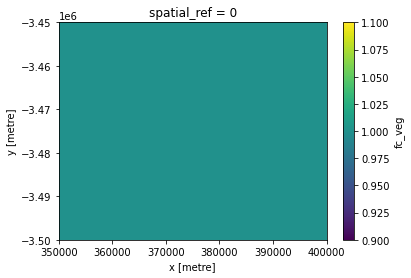

In [76]:
masked.fc_veg.plot()